<h1>Ian Rabago - PHYS 404 HW 2</h1>
<h3>Comparing ratios of Fibonacci terms</h3>

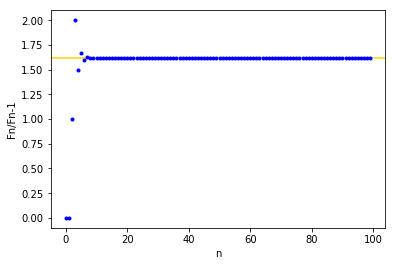

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n=100
t = np.zeros(n+1)
def fib(n):
    t[1] = 1
    for i in range(2, len(t)):
        t[i] = t[i-1] + t[i-2]
    return t[-1]

fib(n)
x = np.arange(n)
r = np.zeros(n)
for i in range(2, n):
    if t[n-1] == 0:
        r[i] = 0
    else:
        r[i] = t[i]/t[i-1]

plt.axhline( y=((1+np.sqrt(5))/2), color='gold' )
plt.plot(x, r, 'b.')
plt.xlabel("n")
plt.ylabel("Fn/Fn-1")
plt.show()

<h3>Defining various Fibonacci methods</h3>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N=10    #Nth term of the Fibonacci sequence.

#Recursive Method: Use the recursive definition
#Memorization Method: Recursive method from top-down, store existing data to avoid recalculation
#Tabulation Method: Write a table from bottom up
#Matrix Method: Use matrix multiplication

# Recursive Method
def fib_recur(n):
    if(n == 1):
        return 1
    if (n == 0):
        return 0
    
    return fib_recur(n-1)+fib_recur(n-2)

# Memorization Method
known = [0]*(N+1)
def fib_memo(n):

    if (n>=1 and known[n]==0):
        known[1] = 1
        known[n] = fib_memo(n-1)+fib_memo(n-2)
    
    return known[n]

# Tabular Method
table = np.zeros(N+1)
def fib_tabular(n):
    if (n==0):
        return 0
    table[1] = 1
    for i in range(2, len(table)):
        table[i] = table[i-1] + table[i-2]
    return table[-1]

A = [[1, 1], [1, 0]]
# Matrix Method
def fib_matrix(n):
    M = [[1, 0], [0, 1]]
    while (n>=0):
        M=np.matmul(M, A)
        n-=1
    return M

print("Recursive Method:", fib_recur(N))
print("Memorization Method:", fib_memo(N))
print(known, len(known))
print("Tabular Method:", fib_tabular(N))
print(table, len(table))
print("Matrix Method:", fib_matrix(N)[1][1], '\n', fib_matrix(N))


Recursive Method: 55
Memorization Method: 55
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55] 11
Tabular Method: 55.0
[  0.   1.   1.   2.   3.   5.   8.  13.  21.  34.  55.] 11
Matrix Method: 55 
 [[144  89]
 [ 89  55]]


<h3>Writing runtime data to file</h3>

In [7]:
import time

with open('fib_output.txt', 'w') as data:

    print("Memorization Method")
    for i in range(4):
        N = 10**i
        known = [0]*(N+1)
        table = np.zeros(N+1)
        t = time.time()
        fib_memo(N)
        #print(format(time.time() - t, '.9f'))
        data.write(format(time.time()-t, '.9f'))    #Formatted to 9 decimal places to avoid scientific notation
        data.write(' ')
    data.write('\n')
    
    print("Tabular Method")
    for i in range(4):
        N = 10**i
        table = np.zeros(N+1)
        t = time.time()
        fib_tabular(N)
        #print(time.time() - t)
        data.write(format(time.time()-t, '.9f'))    #Formatted to 9 decimal places to avoid scientific notation
        data.write(' ')
    data.write('\n')
    
    print("Matrix Method")
    for i in range(7):
        N = 10**i
        t = time.time()
        fib_matrix(N)
        #print(time.time() - t)
        data.write(format(time.time()-t, '.9f'))    #Formatted to 9 decimal places to avoid scientific notation
        data.write(' ')


Memorization Method
Tabular Method
Matrix Method


<h3>Reading from file and plotting runtime vs. N</h3>

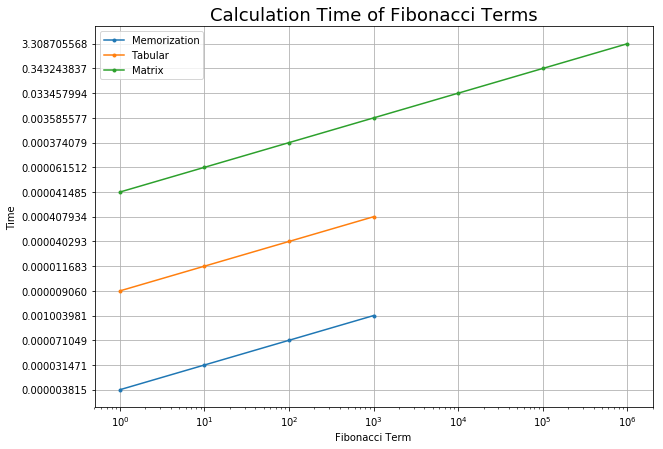

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))

with open('fib_output.txt', 'r') as data:
    for line in data:
        y = line.split()
        x = [10**i for i in range(len(y))]
        plt.semilogx(x, y, '.-')

plt.title("Calculation Time of Fibonacci Terms", fontsize=18)
plt.xlabel("Fibonacci Term")
plt.ylabel("Time")
plt.grid("True")
plt.legend(["Memorization", "Tabular", "Matrix"])
plt.show()